<a href="https://colab.research.google.com/github/AngelinaSmi/Digital-image-processing/blob/main/Lb5_DIP_Smirnova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа № 5 Смирновой А.Е. 24ВВИм1**

Задание: выделить апельсины на изображении.

Загружем необходимые библиотеки, изображение, преобразуем в модель RGB и выведим его

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

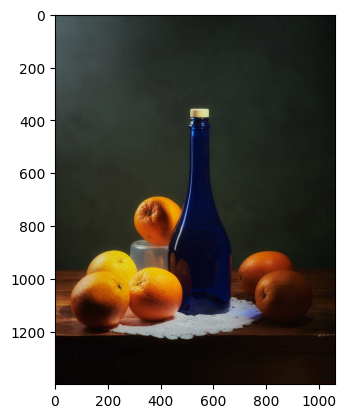

In [3]:
image = cv.imread('lb5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Отображаем разные каналы по разным осям на трехмерном графике. В случае модели RGB не видно кластеризации по цвету.

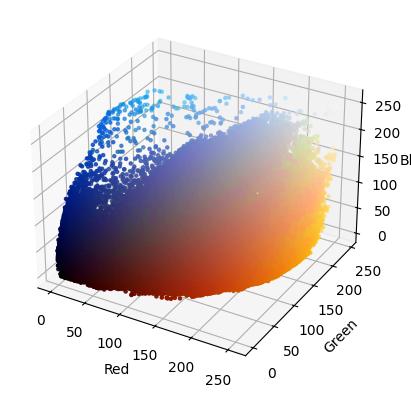

In [ ]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Преобразуем изображение в цветовую модель HSV

In [5]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

Отобразим разные каналы полученного изображения на трехмерном графике

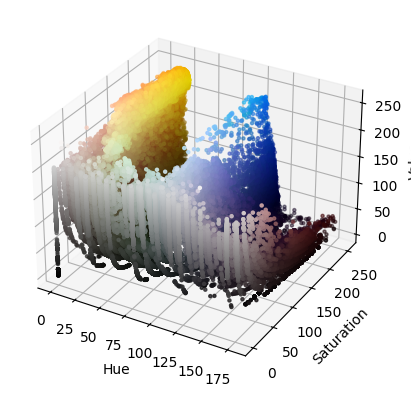

In [ ]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Определяем диапазон оранжевого цвета в HSV и создаем маску

In [6]:
lower_orange = np.array([0, 80, 110])   # нижняя граница
upper_orange = np.array([25, 255, 255])  # верхняя граница
mask = cv.inRange(image_hsv, lower_orange, upper_orange)

Применяем маску к изображению и отображаем результат

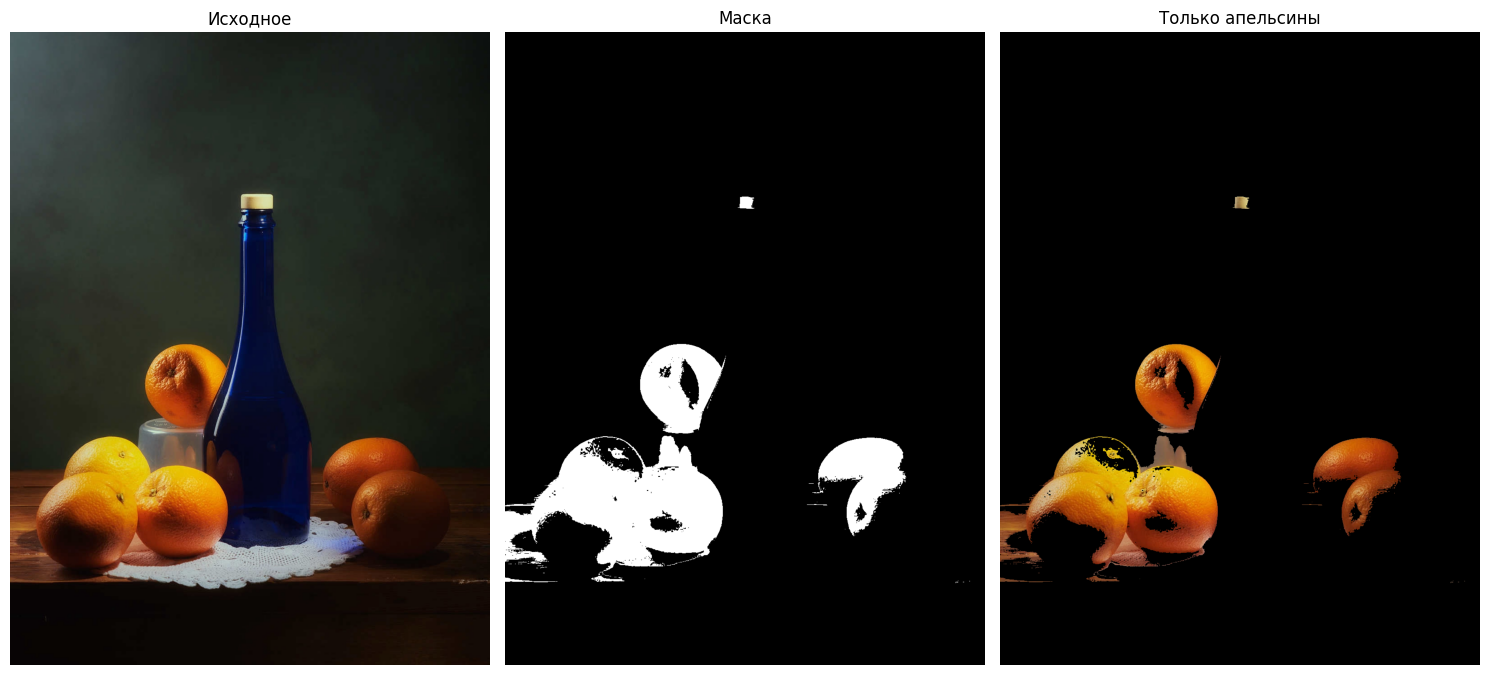

In [7]:
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title("Исходное")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Маска")
plt.imshow(mask, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Только апельсины")
plt.imshow(result)
plt.axis("off")

plt.tight_layout()
plt.show()